# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import zipfile
import io
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Extract the dataset from the Zip file

In [ ]:
zip_file_name = 'archive (1).zip'

with zipfile.ZipFile(zip_file_name, 'r') as zf:
    zf.extractall()

# Load the dataset

In [ ]:
df = pd.read_csv("Amazon Customer Behavior Survey.csv")
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


# Data Description

In [ ]:
df.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


### Descriptive Summary (df.describe(include='all'))

What it does:
Calculates numeric stats (mean, min, max) and categorical stats (unique counts, top category, frequency).

Highlights in your dataset:

Age ranges 3–67 (mean ~31); the very low min suggests possible input error or child respondents.

Purchase_Frequency: most common is “Few times a month”.

Browsing_Frequency: “Few times a week” dominates.

Search behavior: many use categories and explore multiple pages.

Satisfaction averages ~2.46/5, leaving room to improve.

Top improvement area: Customer service responsiveness.

Initial orientation. Spots potential data issues (age outliers) and key behavior patterns that will guide feature engineering and campaign ideas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

### 23 columns, 602 rows.

Mostly categorical (object) survey responses and a few numerics (age, Customer_Reviews_Importance, Shopping_Satisfaction).

Product_Search_Method has 2 missing values; all others complete.

Tells us where cleaning is needed and which columns can be used numerically without conversion.

# Handling Missing Values

In [ ]:
df.replace('?', np.nan, inplace=True)
print(df.isnull().sum())

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [ ]:
df['Product_Search_Method'].fillna(df['Product_Search_Method'].mode()[0], inplace=True)
df.isnull().sum()

,0
Timestamp,0
age,0
Gender,0
Purchase_Frequency,0
Purchase_Categories,0
Personalized_Recommendation_Frequency,0
Browsing_Frequency,0
Product_Search_Method,0
Search_Result_Exploration,0
Customer_Reviews_Importance,0


In [ ]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Fill missing values
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = df[col].fillna(df[col].mode()[0])  # most frequent
    else:
        df[col] = df[col].fillna(df[col].median())   # median for numeric

# Feature Engineering

## Detecting Multi-Select Columns

In [ ]:
def looks_multiselect(series):
    s = series.astype(str)
    return (s.str.contains(';') | s.str.contains(',')).mean() > 0.1

maybe_multi = [c for c in df.select_dtypes(include='object').columns if looks_multiselect(df[c])]
maybe_multi

['Purchase_Categories']

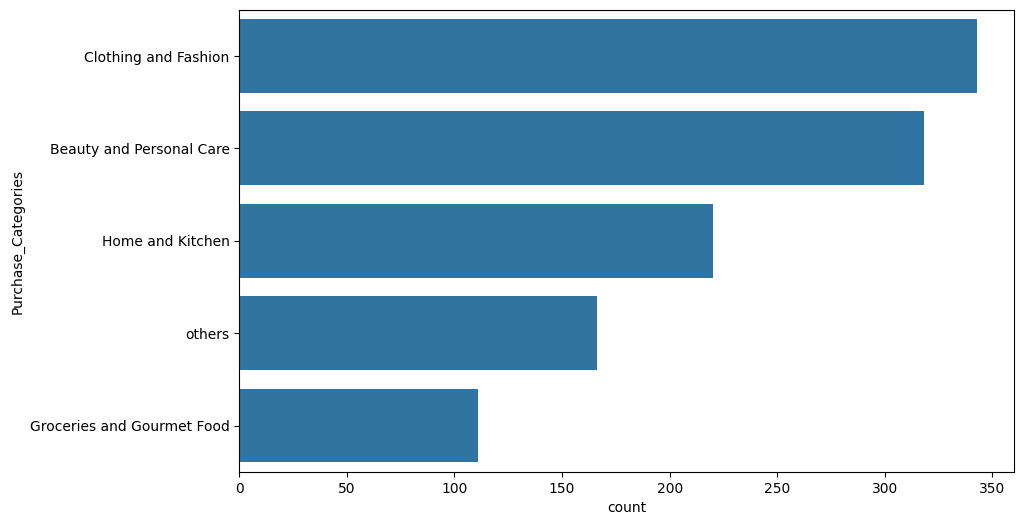

In [ ]:
# Split multi-category values
df['Purchase_Categories'] = df['Purchase_Categories'].astype(str).str.split(';')

# Explode so each category becomes its own row
df_exploded = df.explode('Purchase_Categories')

# Strip extra spaces
df_exploded['Purchase_Categories'] = df_exploded['Purchase_Categories'].str.strip()

plt.figure(figsize=(10,6))
sns.countplot(y="Purchase_Categories",
              data=df_exploded,
              order=df_exploded['Purchase_Categories'].value_counts().index)
plt.show()

Some survey responses allow multiple selections in one cell (e.g., "Email, Social Media").
To handle them correctly during analysis, I first detected the columns likely to contain such multi-valued entries, like Purchase_Categories in this case and splitted them into one single category from better outcome.


## Timestamps Processing

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Timestamp'] += timedelta(hours=5, minutes=30)
df['Date'] = df['Timestamp'].dt.strftime('%d/%m/%Y')
df['Time'] = df['Timestamp'].dt.strftime('%H:%M:%S')

Converted the Timestamp column into a proper datetime format, adjusted it for IST (+5:30),  
and then extracted separate Date and Time columns for easier time-based analysis.

## Time Status

In [ ]:
def Time_cat(x):
    if 6 <= x.hour < 12:
        return 'Morning'
    elif 12 <= x.hour < 18:
        return 'Afternoon'
    elif 18 <= x.hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_Status'] = df['Timestamp'].apply(Time_cat)

Created a Time_Status column by categorizing each timestamp into:
- Morning (6 AM–12 PM)
- Afternoon (12 PM–6 PM)
- Evening (6 PM–9 PM)
- Night (9 PM–6 AM)

This helps in analyzing when customers are most active during the day.

## Age Binning

In [ ]:
def age_cat(row):
    x = row['age']
    if x < 18 :
        return 'Minor (<18)'
    elif (x >= 18) & (x <= 25):
        return 'Young Adults (18-25)'
    elif (x > 25) & (x <= 40):
        return "Adults (26-40)"
    elif (x > 40) & (x <= 60) :
        return 'Middle-Aged Adults (41-60)'
    else :
        return 'Senior Citizens (>60)'
df['Age_Category'] = df.apply(age_cat , axis = 1)

Converted age to numeric safely and bins into age ranges (under_18, 18_24, …, 65_plus). It enables demographic segmentation and avoids crashes from non-numeric or missing ages. Helps tailor product focus and messaging by life stage.

## Recency Days

In [ ]:
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    snapshot_date = df['Timestamp'].max()
    df['Recency_Days'] = (snapshot_date - df['Timestamp']).dt.days
else:
    df['Recency_Days'] = np.nan

Calculated Recency_Days, which measures how many days have passed since each customer’s last activity,  
using the most recent timestamp in the dataset as the reference date.  
If the Timestamp column is missing, the value is set to NaN.

In [ ]:
order = [
    'Date','Time','Time_Status','age','Age_Category',
    'Gender','Purchase_Frequency','Purchase_Categories','Browsing_Frequency',
    'Product_Search_Method','Search_Result_Exploration','Customer_Reviews_Importance',
    'Add_to_Cart_Browsing','Cart_Completion_Frequency','Cart_Abandonment_Factors',
    'Saveforlater_Frequency','Review_Left','Review_Reliability','Review_Helpfulness',
    'Recomendation_Purchase_Status','Personalized_Recommendation_Frequency',
    'Recommendation_Helpfulness','Rating_Accuracy','Shopping_Satisfaction',
    'Service_Appreciation','Improvement_Areas','Recency_Days'
]

order_existing = [col for col in order if col in df.columns]
order_final = order_existing + [col for col in df.columns if col not in order_existing]
df = df[order_final]
df.head()

,Date,Time,Time_Status,age,Age_Category,Gender,Purchase_Frequency,Purchase_Categories,Browsing_Frequency,Product_Search_Method,...,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Recency_Days,Timestamp,Personalized_Recommendation_Frequency,Rating_Accuracy
0,04/06/2023,18:58:19,Evening,23,Young Adults (18-25),Female,Few times a month,[Beauty and Personal Care],Few times a week,Keyword,...,Yes,Yes,Yes,1,Competitive prices,Reducing packaging waste,11,2023-06-04 18:58:19-05:30,2,1
1,04/06/2023,20:00:44,Evening,23,Young Adults (18-25),Female,Once a month,[Clothing and Fashion],Few times a month,Keyword,...,Yes,Yes,Sometimes,2,Wide product selection,Reducing packaging waste,11,2023-06-04 20:00:44-05:30,2,3
2,04/06/2023,22:34:56,Night,24,Young Adults (18-25),Prefer not to say,Few times a month,"[Groceries and Gourmet Food, Clothing and Fash...",Few times a month,Keyword,...,No,No,No,3,Competitive prices,Product quality and accuracy,11,2023-06-04 22:34:56-05:30,4,3
3,04/06/2023,22:43:00,Night,24,Young Adults (18-25),Female,Once a month,"[Beauty and Personal Care, Clothing and Fashio...",Few times a month,Keyword,...,Yes,Sometimes,Sometimes,4,Competitive prices,Product quality and accuracy,11,2023-06-04 22:43:00-05:30,3,3
4,04/06/2023,22:58:06,Night,22,Young Adults (18-25),Female,Less than once a month,"[Beauty and Personal Care, Clothing and Fashion]",Few times a month,Filter,...,Yes,Yes,Yes,2,Competitive prices,Product quality and accuracy,11,2023-06-04 22:58:06-05:30,4,2


# Save to CSV

In [ ]:
# Save to CSV
df.to_csv("amazon_clean.csv", index=False, encoding="utf-8")

print("Clean file saved as amazon_clean.csv")

Clean file saved as amazon_clean.csv


# Categorical Encoding

## Multi-selection of Data

In [ ]:
def expand_multiselect(df, column, separators=(';', ',')):
    # Replace NaN with empty string
    temp = df[column].fillna('').astype(str)

    # Decide the separator
    for sep in separators:
        if sep in temp.str.cat():
            split_items = temp.str.split(sep)
            break
    else:
        split_items = temp.str.split()  # fallback: space

    # Create dummy columns
    mlb_df = pd.get_dummies(split_items.apply(pd.Series).stack()).groupby(level=0).sum()
    mlb_df.columns = [f"{column}_{c.strip()}" for c in mlb_df.columns]

    # Merge back into df
    df = df.drop(columns=[column]).join(mlb_df)
    return df

This function expands a multi-select column into separate binary indicator columns.  
It splits the values by common separators (`;` or `,`), creates dummy variables for each unique option,  
and merges them back into the dataframe for easier analysis.

Very effective for turning messy survey-style multi-select answers into structured, machine-readable features.

This allows each option to be analyzed individually in EDA and used directly in machine learning models.

## Preprocessing blocks

In [ ]:
model_df = df.copy()

# Handle timestamp
if 'Timestamp' in model_df.columns:
    ts = pd.to_datetime(model_df['Timestamp'])
    model_df['Day'] = ts.dt.day
    model_df['Month'] = ts.dt.month
    model_df['Weekday'] = ts.dt.weekday  # 0=Monday, 6=Sunday
    model_df['Hour'] = ts.dt.hour
    model_df.drop(columns=['Timestamp'], inplace=True)

# Expand multi-select columns
for col in maybe_multi:
    model_df = expand_multiselect(model_df, col)

# One-hot encode remaining categorical columns
cat_cols = model_df.select_dtypes(include='object').columns.tolist()
df_encoded = pd.get_dummies(model_df, columns=cat_cols, drop_first=False)

# Fill missing numeric values
for c in df_encoded.select_dtypes(include=[np.number]).columns:
    df_encoded[c] = df_encoded[c].fillna(df_encoded[c].median())

print("Encoded shape:", df_encoded.shape)
df_encoded.head()


Encoded shape: (602, 725)


,age,Customer_Reviews_Importance,Shopping_Satisfaction,Recency_Days,Personalized_Recommendation_Frequency,Rating_Accuracy,Day,Month,Weekday,Hour,...,Improvement_Areas_Nothing,Improvement_Areas_Product quality and accuracy,Improvement_Areas_Quality of product is very poor according to the big offers,Improvement_Areas_Reducing packaging waste,Improvement_Areas_Scrolling option would be much better than going to next page,Improvement_Areas_Shipping speed and reliability,Improvement_Areas_UI,Improvement_Areas_User interface,Improvement_Areas_User interface of app,Improvement_Areas_better app interface and lower shipping charges
0,23,1,1,11,2,1,4,6,6,18,...,False,False,False,True,False,False,False,False,False,False
1,23,1,2,11,2,3,4,6,6,20,...,False,False,False,True,False,False,False,False,False,False
2,24,2,3,11,4,3,4,6,6,22,...,False,True,False,False,False,False,False,False,False,False
3,24,5,4,11,3,3,4,6,6,22,...,False,True,False,False,False,False,False,False,False,False
4,22,1,2,11,4,2,4,6,6,22,...,False,True,False,False,False,False,False,False,False,False


This step ensures no missing values, no unprocessed text, and all variables are in a format that algorithms can use without errors.

It also captures valuable time-based patterns that could improve model performance.

Highly effective because it converts all raw inputs (timestamps, multi-selects, categorical fields) into clean, numeric, model-ready data.

# Exploratory Data Analytics

## Age Analysis

In [ ]:
fig = px.histogram(df, x="age", nbins=10, title="Age Distribution", color_discrete_sequence=['#636EFA'])
fig.show()

Most Amazon shoppers are young adults (25–35).

Few respondents below 18 and some up to 60+.

Business insight: Campaigns should target young professionals & students, but Amazon should not ignore older users who might have higher purchasing power.

## Gender Analysis

In [ ]:
fig = px.pie(df, names="Gender", title="Gender Distribution")
fig.show()

The survey respondents are skewed toward female customers, making up about 58.5% of the sample. This indicates that women are more engaged in online shopping or more represented in this dataset. This is important when interpreting the results, because their preferences might dominate category trends.

## Browsing Frequency Analysis

In [ ]:
fig = px.histogram(df, y="Browsing_Frequency", nbins=10, title="Browsing Frequency", color_discrete_sequence=['#636EFA'])
fig.show()

High engagement overall:

Most customers browse at least weekly.
This shows Amazon is part of customers’ regular shopping habits.

Gap between browsing & buying:

Frequent browsing does not always translate into frequent purchases.
Indicates that while interest is high, conversion opportunities are being missed.

Low daily engagement:

Only a small portion browse multiple times a day.
Suggests that Amazon is not yet positioned as a platform for “everyday essentials” (like groceries, quick purchases).

# Elbow Method

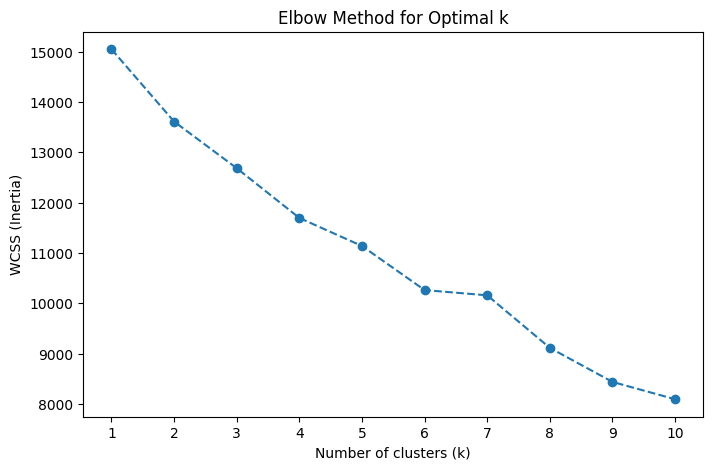

In [ ]:
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(df_encoded.select_dtypes(include=[np.number]))

# Elbow Method to find the optimal number of clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

The Elbow Method helps determine the optimal number of clusters by plotting
the within-cluster sum of squares (WCSS) for different values of k.  
The "elbow point" on the curve indicates a good balance between model complexity and explained variance.  
From the plot, we can see that 'k' is a reasonable choice, which we then validate using the silhouette score.


# Clustering

In [ ]:
sil_scores = {}
for k in range(2, 9):
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = km.fit_predict(X)
    sil_scores[k] = silhouette_score(X, labels)

best_k = max(sil_scores, key=sil_scores.get)
print("Silhouette scores:", sil_scores)
print("Best K =", best_k, " / Silhouette =", round(sil_scores[best_k], 3))


kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
segments = kmeans.fit_predict(X)


df_out = df.copy()
df_out['Segment'] = segments
df_out.head()

Silhouette scores: {2: np.float64(0.11968189936704085), 3: np.float64(0.16536835952923667), 4: np.float64(0.1615062487814767), 5: np.float64(0.12864351803196802), 6: np.float64(0.14840528261330857), 7: np.float64(0.12843381714589522), 8: np.float64(0.2098019322176036)}
Best K = 8  / Silhouette = 0.21


,Date,Time,Time_Status,age,Age_Category,Gender,Purchase_Frequency,Purchase_Categories,Browsing_Frequency,Product_Search_Method,...,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Recency_Days,Timestamp,Personalized_Recommendation_Frequency,Rating_Accuracy,Segment
0,04/06/2023,18:58:19,Evening,23,Young Adults (18-25),Female,Few times a month,[Beauty and Personal Care],Few times a week,Keyword,...,Yes,Yes,1,Competitive prices,Reducing packaging waste,11,2023-06-04 18:58:19-05:30,2,1,5
1,04/06/2023,20:00:44,Evening,23,Young Adults (18-25),Female,Once a month,[Clothing and Fashion],Few times a month,Keyword,...,Yes,Sometimes,2,Wide product selection,Reducing packaging waste,11,2023-06-04 20:00:44-05:30,2,3,0
2,04/06/2023,22:34:56,Night,24,Young Adults (18-25),Prefer not to say,Few times a month,"[Groceries and Gourmet Food, Clothing and Fash...",Few times a month,Keyword,...,No,No,3,Competitive prices,Product quality and accuracy,11,2023-06-04 22:34:56-05:30,4,3,7
3,04/06/2023,22:43:00,Night,24,Young Adults (18-25),Female,Once a month,"[Beauty and Personal Care, Clothing and Fashio...",Few times a month,Keyword,...,Sometimes,Sometimes,4,Competitive prices,Product quality and accuracy,11,2023-06-04 22:43:00-05:30,3,3,1
4,04/06/2023,22:58:06,Night,22,Young Adults (18-25),Female,Less than once a month,"[Beauty and Personal Care, Clothing and Fashion]",Few times a month,Filter,...,Yes,Yes,2,Competitive prices,Product quality and accuracy,11,2023-06-04 22:58:06-05:30,4,2,7


Scaled all numeric features and ran K-Means clustering for K=2 to K=9,  
selecting the number of clusters with the highest silhouette score (best separation between groups).  
And then fited the final K-Means model, assigned each customer to a segment,  
and added this Segment column back to the original dataset for profiling.

# Segment Profiling

In [ ]:
# Numeric profile (use only numeric columns that existed before encoding)
numeric_for_profile = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Recency_Days' in df_out.columns and 'Recency_Days' not in numeric_for_profile:
    numeric_for_profile.append('Recency_Days')

profile_num = df_out.groupby('Segment')[numeric_for_profile].mean().round(2)
sizes = (df_out['Segment'].value_counts(normalize=True) * 100).round(2).sort_index()

print("Segment sizes (%):\n", sizes)
print("\nNumeric profile (means):\n", profile_num)

# Simple size plot
fig = px.histogram(df_out, x="Segment", nbins=10, title="Segment Sizes (%)", color_discrete_sequence=['#636EFA'])
fig.show()

Segment sizes (%):
 Segment
0    22.59
1     7.14
2     9.47
3    11.96
4     7.97
5    21.59
6     8.97
7    10.30
Name: proportion, dtype: float64

Numeric profile (means):
            age  Customer_Reviews_Importance  Shopping_Satisfaction  \
Segment                                                              
0        30.74                         2.67                   2.70   
1        31.30                         2.26                   2.14   
2        29.12                         2.74                   2.60   
3        32.01                         2.35                   2.25   
4        28.77                         2.46                   2.71   
5        31.69                         2.59                   2.65   
6        32.69                         1.94                   1.89   
7        28.68                         2.39                   2.21   

         Recency_Days  Personalized_Recommendation_Frequency   \
Segment                                                   

Both Segment 0 (22.6%) and Segment 5 (21.6%) are large in size, and together they account for ~44% of all customers.

Both show higher satisfaction, frequent purchases, and strong interaction with reviews/recommendations which means they’re loyal and engaged groups.

And the lowest engagement comes from segment 1 and segment 4.

# Top Segments

In [ ]:
# Calculate segment sizes
segment_sizes = df_out['Segment'].value_counts(normalize=True) * 100

# Calculate average satisfaction per segment
seg_satisfaction = df_out.groupby('Segment')['Shopping_Satisfaction'].mean()

# Combine into a single DataFrame
seg_summary = pd.DataFrame({
    'Size_%': segment_sizes,
    'Avg_Satisfaction': seg_satisfaction
}).sort_values(['Size_%','Avg_Satisfaction'], ascending=False)

display(seg_summary)

# Pick top 2 segments: largest + happiest
top_segments = seg_summary.head(2).index
print("Top Segments:", list(top_segments))

,Size_%,Avg_Satisfaction
Segment,,
0,22.591362,2.698529
5,21.594684,2.653846
3,11.960133,2.250000
7,10.299003,2.209677
2,9.468439,2.596491
6,8.970100,1.888889
4,7.973422,2.708333
1,7.142857,2.139535


Top Segments: [0, 5]


By analysing the top segments it is clear that Segment 5 and Segment 6 can maximize engagement and reduce acquisition costs.

Segment 0 represent Balanced Shoppers (22.6%), Regular buyers, who are generally highly satisfied and gives strong response to recommendations. They are basically Amazon’s core stable base.

Segment 5 represents loyal, review-driven, and highly satisfied shoppers. They trust reviews, interact with recommendations, and shop regularly. This is a core customer base Amazon should invest in for long-term growth and loyalty.



# Which Industry to Invest on?

In [ ]:
# Filter for best segments (0 and 5 from previous analysis)
top_segments = [0, 5]

# Filter the dataframe for the top segments
df_top_segments = df_out[df_out['Segment'].isin(top_segments)].copy()

# Flatten the list of categories and count them
category_list = [item for sublist in df_top_segments['Purchase_Categories'] for item in sublist]
category_counts = pd.Series(category_list).value_counts()

print("Top purchase categories for Segments 0 & 5:")
print(category_counts.head(10))

Top purchase categories for Segments 0 & 5:
Beauty and Personal Care      113
Clothing and Fashion          106
Home and Kitchen               33
Groceries and Gourmet Food     21
others                          9
Name: count, dtype: int64


### Recommendation:
The analysis shows Segments 0 & 5 give the best return. Within these, the top purchase category is the Beauty & Personal Care and the clothing and fashion, so Amazon should invest marketing budget into Beauty and clothing campaigns targeted specifically at these segments.